In [2]:
import numpy as np

import pylab
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import ast
import math
import time
from datetime import datetime
import glob
import sys
import copy
import cv2
from imp import reload
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import csv

# read in db flyProjects to get experimetns at 45° 20_01_07


In [12]:
readin_id2 =pd.DataFrame()
dbs =['_20_01_07.db','_19_12_09.db','_19_11_28.db']
for n in range(len(dbs)):
    print(dbs[n])

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustProjects"+dbs[n])
    query2 = "SELECT  post0,exp,replicate, nStimuli  FROM projects;" #
    readin_angle = pd.read_sql_query(query2,conn)


    readin_angle['index'] = list(range(len(readin_angle.index)))

    tab2=pd.DataFrame()
    #readin_angle.head(10)

    #['position','angle','distance']

    dist_read = False
    print('readin_anglekeys',readin_angle.keys())
    #60 degree angle
    angle60=(math.pi/180*60)
    angle30=(math.pi/180*30)
    angle45=(math.pi/180*45)
    angle180=(math.pi)

    a=True
    #p= pd.DataFrame(readin_angle,l)#.T.to_dict()
    for i in range(0,250):

        #(readin_angle[readin_angle['index'] == i])
        #250 diff conditions from which to pick available



        if (ast.literal_eval(readin_angle.loc[i].values[0])) != None:
            ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

            if dist_read == False:
                dist = (ast.literal_eval(readin_angle.loc[i].values[0])['distance'])
                dist_read = True
            if readin_angle['exp'][i] <10: 
                
                tab=(readin_angle[readin_angle['index'] == i])
                tab2=tab2.append(tab,ignore_index=True)
                    
                    
    
    #######################EXPERIMENT ID READIN

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustExperiments"+dbs[n])

    query = "SELECT exp, replicate, date,tStart, expId FROM experiments;"
    readin_id = pd.read_sql_query(query,conn)
    print(readin_id.keys())
    readin_id=readin_id.assign(nStimuli = 5)
    #posi=(ast.literal_eval(readin_angle.loc[0].values[0])['position'])
    #posi=0
    readin_id=readin_id.assign(position_post0_x = 1.0)
    readin_id=readin_id.assign(position_post0_y = 1.0)

    #ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

    for i in range(0,len(readin_id.index)):
        #iterate through 40 rows of readin_id

        #kombi exp+ replicate in tab2 abgleichen und nStimuli rausschreiben!)
        b=readin_id['exp'][i]
        c=readin_id['replicate'][i]
        e=readin_id['date'][i]
        #tstart=readin_id['tStart'][i]

        for d in range(len(tab2)):
            #iterate through 50 rows of tab2
            if tab2['exp'][d]==b and tab2['replicate'][d]==c:
                #print(tab2['exp'][d], tab2['replicate'][d], tab2['nStimuli'][d]  )

                #print(tab2['nStimuli'][d])
                f=tab2['nStimuli'][d]
                #g=tab2['post0']
                g=(ast.literal_eval(tab2.loc[d].values[0])['position'])
                h=round(g[0], 2)
                k=round(g[1], 2)
                #print(g.keys())
                #print(h,k)
                readin_id['nStimuli'][i]=f

                readin_id['position_post0_x'][i]=h
                readin_id['position_post0_y'][i]=k

    readin_id.reset_index(drop=True, inplace=True) 
    #exper_date='2019-12-12'
    

    
    readin_id2= readin_id2.append(readin_id, ignore_index=True)
    print(readin_id)

    #40 expIDs available

_20_01_07.db
('readin_anglekeys', Index([u'post0', u'exp', u'replicate', u'nStimuli', u'index'], dtype='object'))
Index([u'exp', u'replicate', u'date', u'tStart', u'expId'], dtype='object')


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    exp  replicate        date tStart                                 expId  \
0     0          2  2020-01-07  11:59  c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a   
1     0          2  2020-01-07  13:06  54a35a9f-9eb0-4404-bc9d-8ed7b71192c5   
2     0          4  2020-01-07  14:04  7ac51c48-5f5a-4ac3-9930-56772578c1ee   
3     1          3  2020-01-07  15:30  3a1d5deb-e8f7-48a4-aabb-25456f941c43   
4     1          1  2020-01-08  09:18  752b3218-e802-47e8-bbc6-1049f15e6f85   
5     2          4  2020-01-08  11:31  13e69b2f-9760-4625-a309-511af2c5afb2   
6     2          0  2020-01-08  13:12  2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d   
7     2          0  2020-01-08  14:08  da620536-7437-4bf6-a7de-ba36f19b4177   
8     3          3  2020-01-08  17:30  acb6ec35-e1e0-450a-98ca-581b0f21723e   
9     3          4  2020-01-09  10:00  1730f55c-ba6b-467b-96a8-f23c387f2905   
10    3          3  2020-01-09  11:01  a57b486a-c26a-4016-9722-56846965487e   
11    4          1  2020-01-09  12:06  ded361ec-3214

# EXPERIMENT ID READIN

In [13]:
readin_id2

,exp,replicate,date,tStart,expId,nStimuli,position_post0_x,position_post0_y
0,0,2,2020-01-07,11:59,c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a,4,1.0,1.73
1,0,2,2020-01-07,13:06,54a35a9f-9eb0-4404-bc9d-8ed7b71192c5,4,1.0,1.73
2,0,4,2020-01-07,14:04,7ac51c48-5f5a-4ac3-9930-56772578c1ee,4,1.0,1.73
3,1,3,2020-01-07,15:30,3a1d5deb-e8f7-48a4-aabb-25456f941c43,4,-1.0,-1.73
4,1,1,2020-01-08,09:18,752b3218-e802-47e8-bbc6-1049f15e6f85,4,-1.0,-1.73
5,2,4,2020-01-08,11:31,13e69b2f-9760-4625-a309-511af2c5afb2,4,-1.0,1.73
6,2,0,2020-01-08,13:12,2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d,4,-1.0,1.73
7,2,0,2020-01-08,14:08,da620536-7437-4bf6-a7de-ba36f19b4177,4,-1.0,1.73
8,3,3,2020-01-08,17:30,acb6ec35-e1e0-450a-98ca-581b0f21723e,4,1.0,1.73
9,3,4,2020-01-09,10:00,1730f55c-ba6b-467b-96a8-f23c387f2905,4,1.0,1.73


# csv

('tstart', u'11:59')
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
0


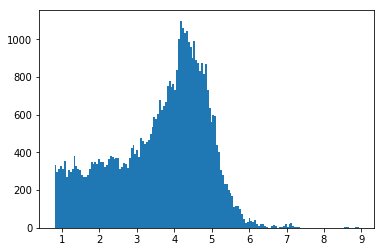

('tstart', u'13:06')
/home/bianca/Documents/github/locustVR/databases/data_collection/54a35a9f-9eb0-4404-bc9d-8ed7b71192c5/results.csv
1


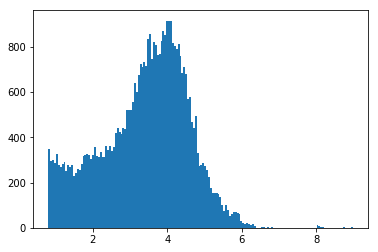

('tstart', u'14:04')
/home/bianca/Documents/github/locustVR/databases/data_collection/7ac51c48-5f5a-4ac3-9930-56772578c1ee/results.csv
2


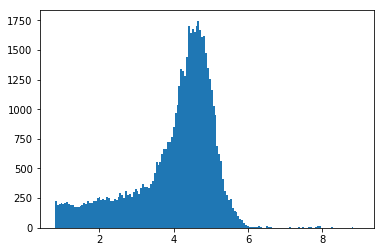

('tstart', u'15:30')
/home/bianca/Documents/github/locustVR/databases/data_collection/3a1d5deb-e8f7-48a4-aabb-25456f941c43/results.csv
3


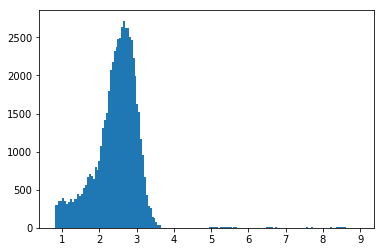

('tstart', u'09:18')
/home/bianca/Documents/github/locustVR/databases/data_collection/752b3218-e802-47e8-bbc6-1049f15e6f85/results.csv
4


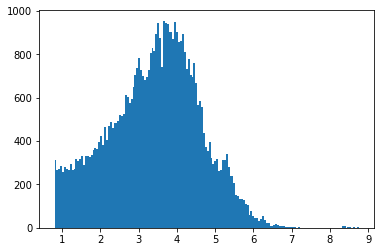

('tstart', u'11:31')
/home/bianca/Documents/github/locustVR/databases/data_collection/13e69b2f-9760-4625-a309-511af2c5afb2/results.csv
5


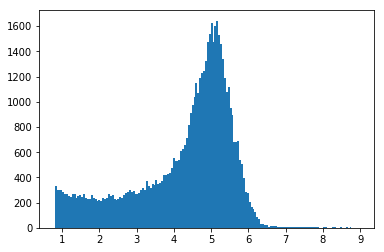

('tstart', u'13:12')
/home/bianca/Documents/github/locustVR/databases/data_collection/2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d/results.csv
6


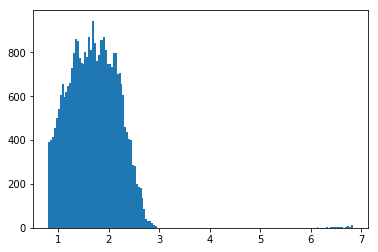

('tstart', u'14:08')
/home/bianca/Documents/github/locustVR/databases/data_collection/da620536-7437-4bf6-a7de-ba36f19b4177/results.csv
7


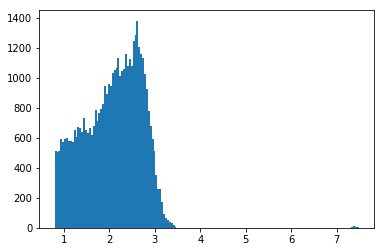

('tstart', u'17:30')
/home/bianca/Documents/github/locustVR/databases/data_collection/acb6ec35-e1e0-450a-98ca-581b0f21723e/results.csv
8


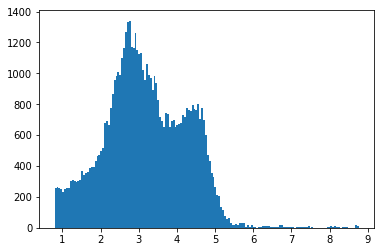

('tstart', u'10:00')
/home/bianca/Documents/github/locustVR/databases/data_collection/1730f55c-ba6b-467b-96a8-f23c387f2905/results.csv
9


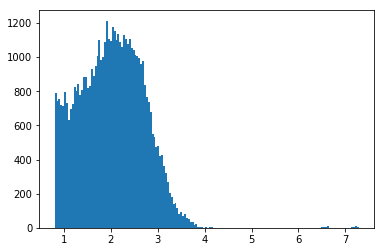

('tstart', u'11:01')
/home/bianca/Documents/github/locustVR/databases/data_collection/a57b486a-c26a-4016-9722-56846965487e/results.csv
10


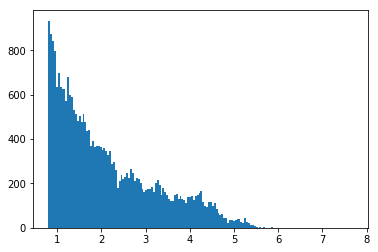

('tstart', u'12:06')
/home/bianca/Documents/github/locustVR/databases/data_collection/ded361ec-3214-458a-858f-1be11809fd14/results.csv
11


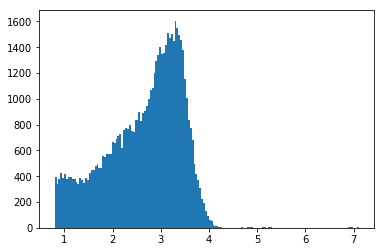

('tstart', u'14:48')
/home/bianca/Documents/github/locustVR/databases/data_collection/8f13a403-e1bd-4adf-9a4a-ef18b2e4915e/results.csv
12


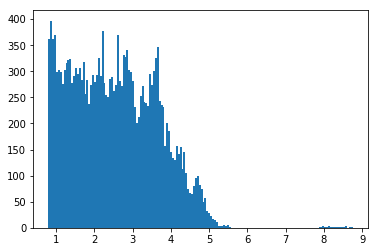

('tstart', u'15:54')
/home/bianca/Documents/github/locustVR/databases/data_collection/8e0cb790-55be-46b5-be17-f92c2208f12d/results.csv
13


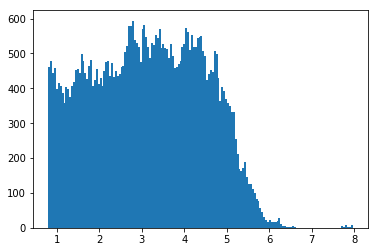

('tstart', u'16:52')
/home/bianca/Documents/github/locustVR/databases/data_collection/5cb7d44f-5166-46ce-b317-f4bd8d3267c5/results.csv
14


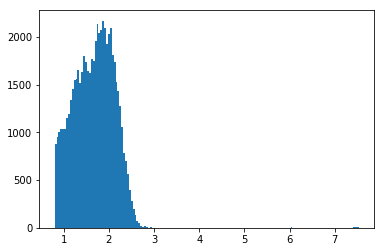

('tstart', u'18:07')
/home/bianca/Documents/github/locustVR/databases/data_collection/9e41ebbd-fadd-4ea5-8457-77c541faa137/results.csv
15


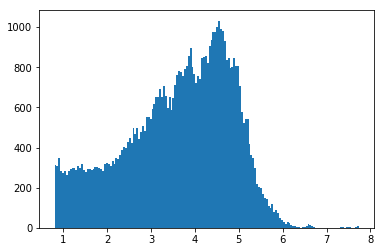

('tstart', u'08:40')
/home/bianca/Documents/github/locustVR/databases/data_collection/e62178c9-e0f0-4970-82b6-e26225576f3b/results.csv
16


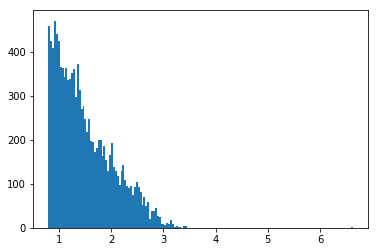

('tstart', u'11:19')
/home/bianca/Documents/github/locustVR/databases/data_collection/19c69caf-3dc5-4cf4-950c-95acad45ecd9/results.csv
17


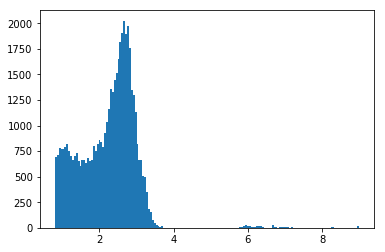

('tstart', u'13:14')
/home/bianca/Documents/github/locustVR/databases/data_collection/a678f783-103d-4485-a995-78d7f6b9824e/results.csv
18


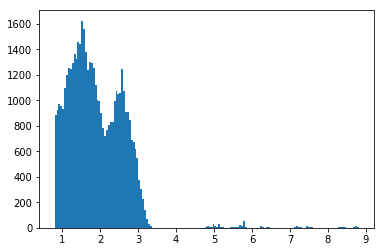

('tstart', u'17:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/43f0818a-bae1-44ca-bef9-8823bb8c8ab9/results.csv
19


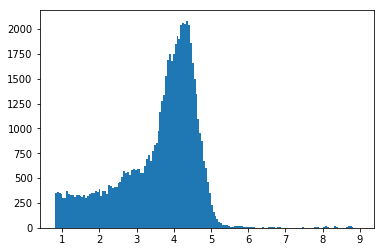

('tstart', u'09:14')
/home/bianca/Documents/github/locustVR/databases/data_collection/5e103a3b-105b-4820-92e1-b2c2cf2c11ee/results.csv
20


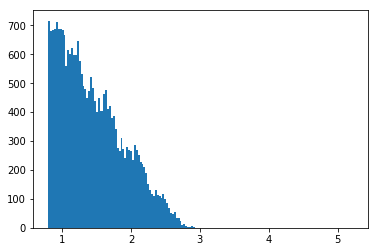

('tstart', u'10:46')
/home/bianca/Documents/github/locustVR/databases/data_collection/2292bbb7-d520-4715-a948-dbd7422e6660/results.csv
21


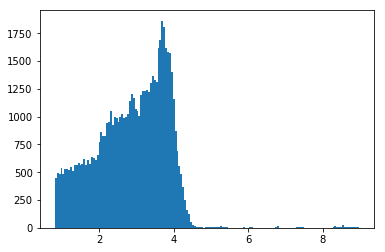

('tstart', u'12:37')
/home/bianca/Documents/github/locustVR/databases/data_collection/125adcc5-4f9b-47ba-9849-53aa901c5442/results.csv
22


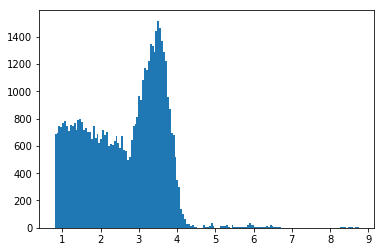

('tstart', u'14:48')
/home/bianca/Documents/github/locustVR/databases/data_collection/bb55e2f3-585f-4f80-8150-a719ef75deec/results.csv
23


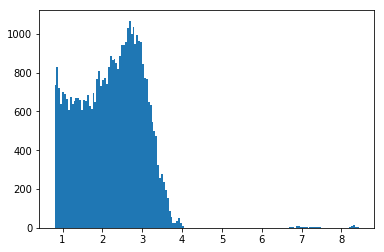

('tstart', u'16:09')
/home/bianca/Documents/github/locustVR/databases/data_collection/e0812ca8-c9a4-4ce7-8a33-a9560cf538f7/results.csv
24


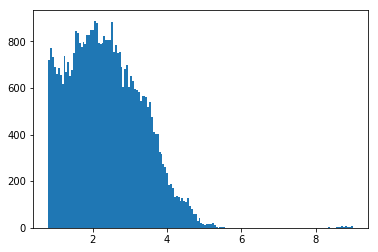

('tstart', u'10:32')
/home/bianca/Documents/github/locustVR/databases/data_collection/b06e1942-5c28-4b3e-bb96-11bb36047f69/results.csv
25


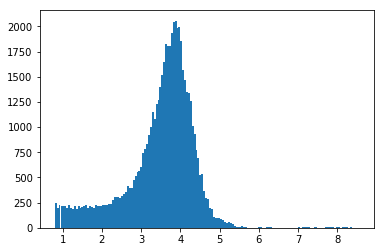

('tstart', u'11:51')
/home/bianca/Documents/github/locustVR/databases/data_collection/7dfa5ca0-9425-4f3f-8e09-061b01eb9435/results.csv
26


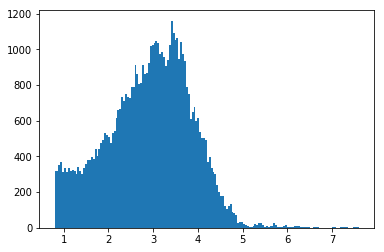

('tstart', u'13:12')
/home/bianca/Documents/github/locustVR/databases/data_collection/b727a0ae-037b-4c99-b60a-fbf1befd5c54/results.csv
27


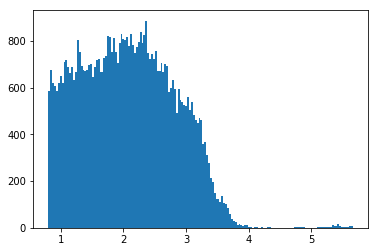

('tstart', u'14:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/4c6c1b17-5a12-43f9-8c26-739869756083/results.csv
28


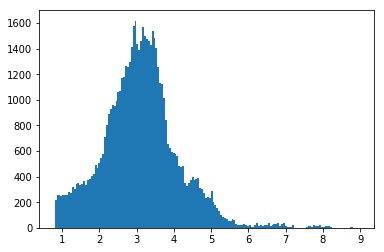

('tstart', u'11:55')
/home/bianca/Documents/github/locustVR/databases/data_collection/9168c081-46fe-4fca-9395-d393a473db78/results.csv
29


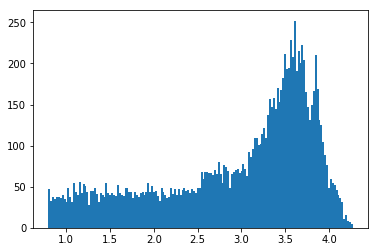

('tstart', u'13:10')
/home/bianca/Documents/github/locustVR/databases/data_collection/06576742-737f-4d2f-96d4-4b443af5cde5/results.csv
30


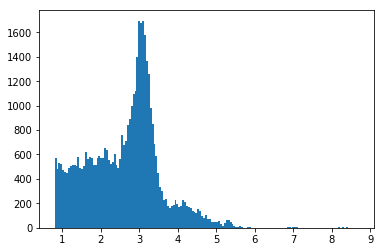

('tstart', u'14:39')
/home/bianca/Documents/github/locustVR/databases/data_collection/3e23afdc-8a71-496f-8156-20e07f839556/results.csv
31


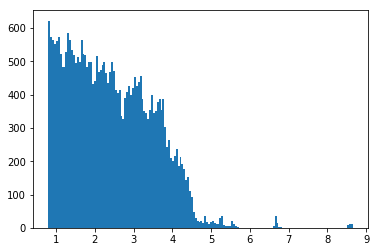

('tstart', u'10:50')
/home/bianca/Documents/github/locustVR/databases/data_collection/c7f84a6e-7645-49a4-8580-dcd190cfdc26/results.csv
32


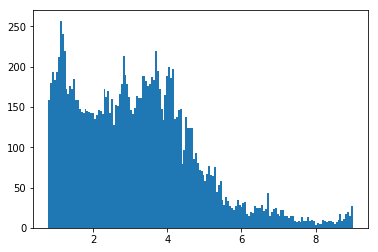

('tstart', u'11:58')
/home/bianca/Documents/github/locustVR/databases/data_collection/573ae5a4-af21-4bed-9485-11e0518ac8b5/results.csv
33


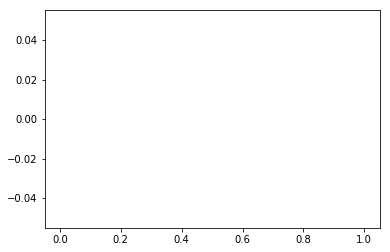

('tstart', u'13:43')
/home/bianca/Documents/github/locustVR/databases/data_collection/6c731cfe-e377-4a26-8be8-200688f1a913/results.csv
34


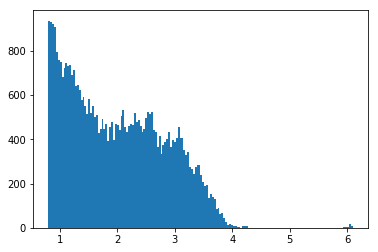

('tstart', u'17:07')
/home/bianca/Documents/github/locustVR/databases/data_collection/65f2cf47-7e29-4c89-b3bf-a2c51aa45be5/results.csv
35


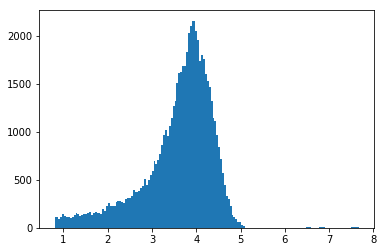

('tstart', u'09:46')
/home/bianca/Documents/github/locustVR/databases/data_collection/eb509dc9-c50d-460f-be68-3ca644ce64c2/results.csv
36


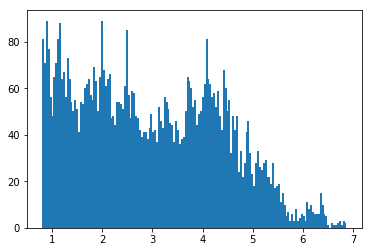

('tstart', u'10:55')
/home/bianca/Documents/github/locustVR/databases/data_collection/2dad897d-abbd-41ed-8551-a9e571c1db60/results.csv
37


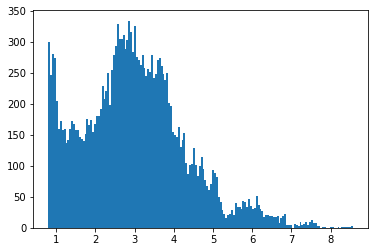

('tstart', u'11:22')
/home/bianca/Documents/github/locustVR/databases/data_collection/cc676da9-948f-4e26-887c-675dbb8b1c1d/results.csv
38


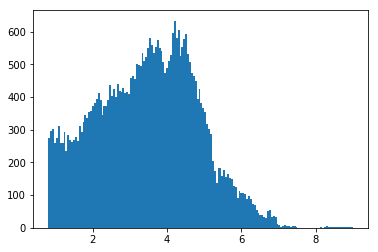

('tstart', u'15:09')
/home/bianca/Documents/github/locustVR/databases/data_collection/64e764ff-ef4d-416b-a5d9-19314e2cba29/results.csv
39


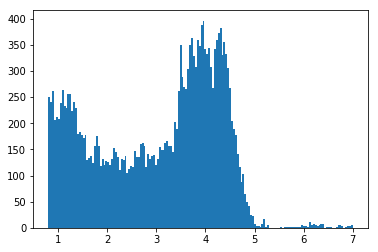

('tstart', u'15:44')
/home/bianca/Documents/github/locustVR/databases/data_collection/834051c0-f64f-4056-82e9-707be70e8c3e/results.csv
40


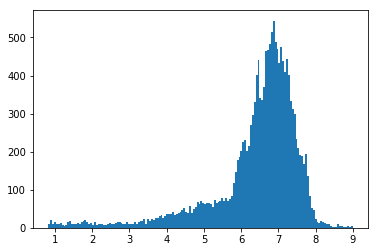

('tstart', u'15:57')
/home/bianca/Documents/github/locustVR/databases/data_collection/a8bf4096-b100-4d46-b7b5-faba8367afb0/results.csv
41


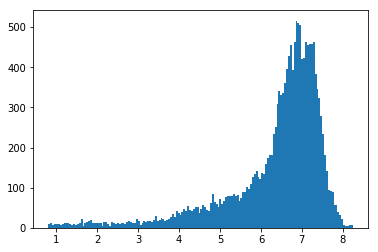

('tstart', u'16:15')
/home/bianca/Documents/github/locustVR/databases/data_collection/09150be3-2082-4a61-9024-892832de69ae/results.csv
42


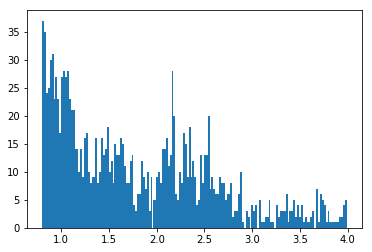

('tstart', u'10:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/d8c872ac-5c57-46a5-bc19-a37d95415ece/results.csv
43


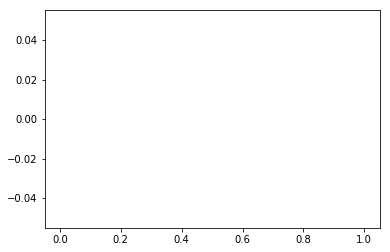

('tstart', u'09:19')
/home/bianca/Documents/github/locustVR/databases/data_collection/69011dfe-8ad1-435d-bbef-c2b35ebb6c0d/results.csv
44


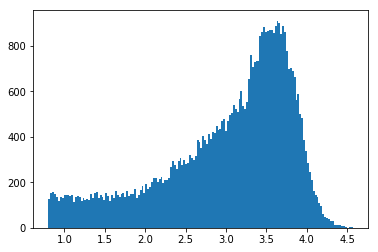

('tstart', u'10:27')
/home/bianca/Documents/github/locustVR/databases/data_collection/c20dfb00-d894-4805-9bd9-265a634440af/results.csv
45


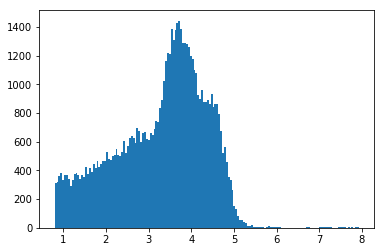

('tstart', u'11:33')
/home/bianca/Documents/github/locustVR/databases/data_collection/1aee1148-beec-4fae-85c3-d9814006e484/results.csv
46


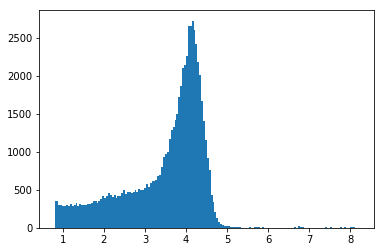

('tstart', u'13:48')
/home/bianca/Documents/github/locustVR/databases/data_collection/f065d8d3-1b6f-4fc2-9445-2d01512710ae/results.csv
47


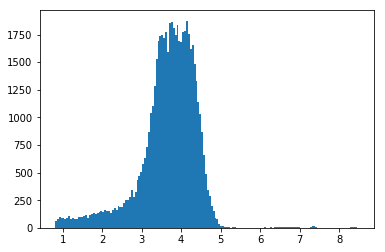

('tstart', u'15:01')
/home/bianca/Documents/github/locustVR/databases/data_collection/a1eb9b01-863c-4995-a16c-a26b21589c6c/results.csv
48


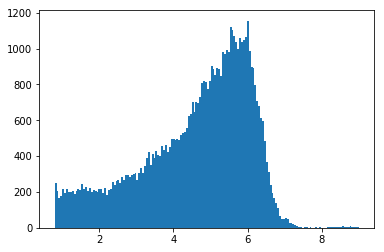

('tstart', u'17:37')
/home/bianca/Documents/github/locustVR/databases/data_collection/af1987ed-5188-4b79-a3b7-049fa18b37f9/results.csv
49


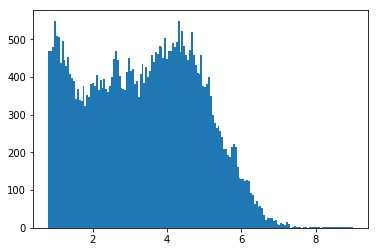

('tstart', u'10:50')
/home/bianca/Documents/github/locustVR/databases/data_collection/507714a4-a7e8-48d4-a98f-63958cf7f93a/results.csv
50


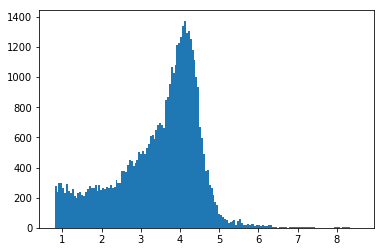

('tstart', u'12:17')
/home/bianca/Documents/github/locustVR/databases/data_collection/eb83c370-53d0-4595-bebf-e87e355cb370/results.csv
51


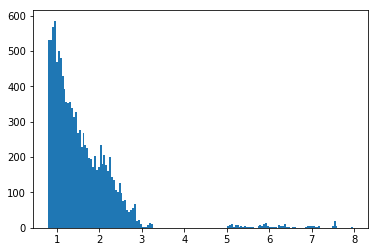

('tstart', u'13:43')
/home/bianca/Documents/github/locustVR/databases/data_collection/e88a5554-fec1-458c-9c83-c98e5529e6fd/results.csv
52


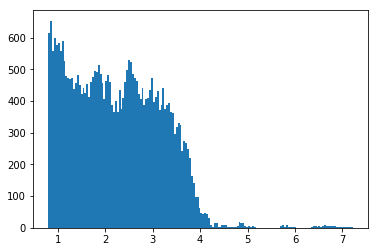

('tstart', u'17:58')
/home/bianca/Documents/github/locustVR/databases/data_collection/41e5c6b4-4310-453d-81c3-63c6db646ee8/results.csv
53


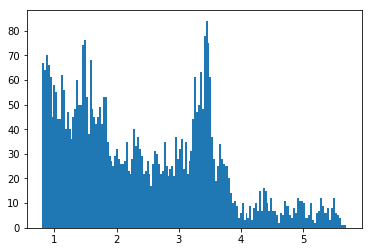

('tstart', u'10:01')
/home/bianca/Documents/github/locustVR/databases/data_collection/9eb6bd1e-9072-4994-98cf-f0264ff5399d/results.csv
54


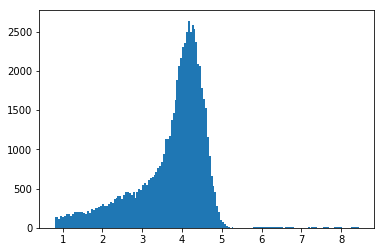

('tstart', u'11:16')
***************************csv in row 55 doesnt exist**********************
('tstart', u'13:36')
***************************csv in row 56 doesnt exist**********************
('tstart', u'08:41')
/home/bianca/Documents/github/locustVR/databases/data_collection/fea86966-c7a8-49f5-bf93-f8a38453e875/results.csv
57


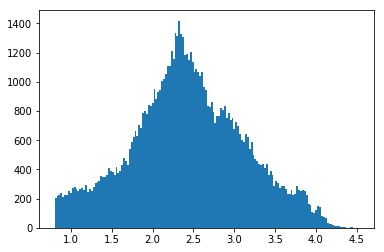

('tstart', u'09:49')
/home/bianca/Documents/github/locustVR/databases/data_collection/32d1f550-279f-4c2a-8456-65483875ad86/results.csv
58


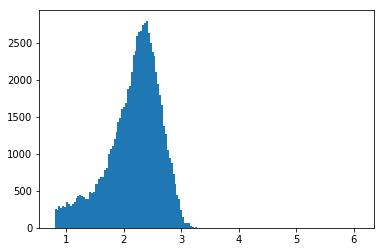

('tstart', u'10:53')
/home/bianca/Documents/github/locustVR/databases/data_collection/a6e70613-9c6b-4417-bc3a-ff0ce95a1ee5/results.csv
59


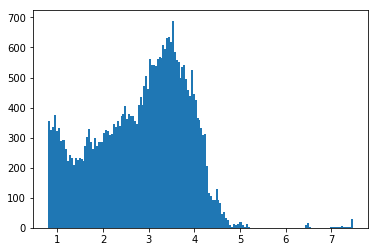

('tstart', u'11:49')
/home/bianca/Documents/github/locustVR/databases/data_collection/bb9e6a9d-67e1-40de-9f4c-464da0a824ba/results.csv
60


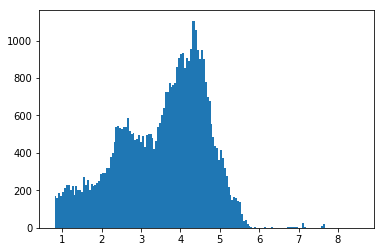

('tstart', u'14:43')
/home/bianca/Documents/github/locustVR/databases/data_collection/4c9a6d29-ac3d-4ed8-a67d-f5a75d5cec9c/results.csv
61


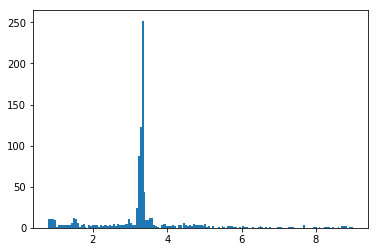

('tstart', u'10:17')
/home/bianca/Documents/github/locustVR/databases/data_collection/353adab2-d51f-4885-adba-508ba2cac467/results.csv
62


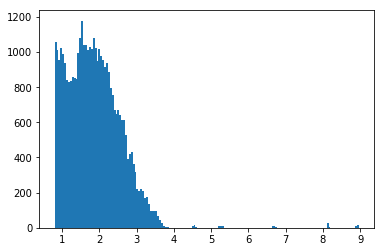

('tstart', u'13:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/3a521430-7aa6-412b-8d00-62524874d36a/results.csv
63


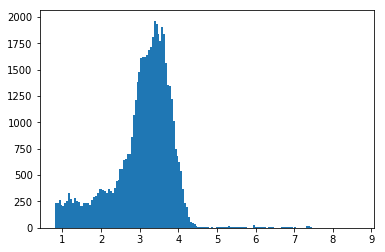

('tstart', u'13:59')
/home/bianca/Documents/github/locustVR/databases/data_collection/e3f84ff4-d4b5-415b-9527-5ac834f7cba4/results.csv
64


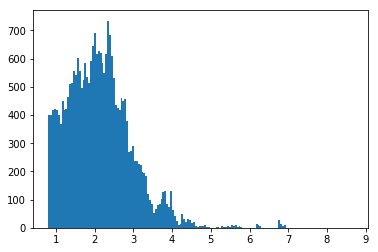

('tstart', u'14:43')
/home/bianca/Documents/github/locustVR/databases/data_collection/cd75759c-29e2-4ea9-867e-898ee8a02978/results.csv
65


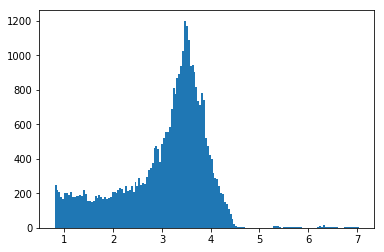

('tstart', u'16:04')
/home/bianca/Documents/github/locustVR/databases/data_collection/fc408072-8c38-4393-83a9-57eade5c057f/results.csv
66


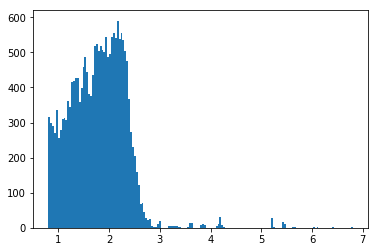

('tstart', u'17:40')
/home/bianca/Documents/github/locustVR/databases/data_collection/b4b1da4d-0aea-4d0c-ba3e-1c113d464135/results.csv
67


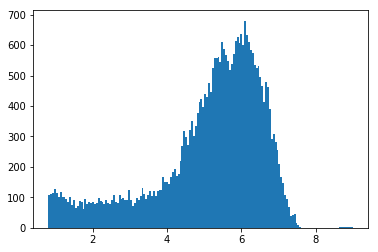

('tstart', u'13:38')
/home/bianca/Documents/github/locustVR/databases/data_collection/cc8377c9-e811-40cc-bb67-565e78c0f8bf/results.csv
68


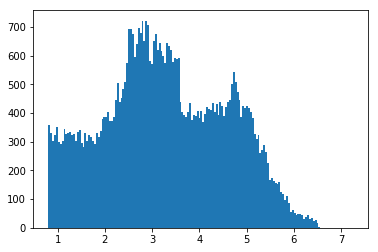

('tstart', u'15:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/e3ce0a89-62ec-47fe-b850-d22b0d0d0527/results.csv
69


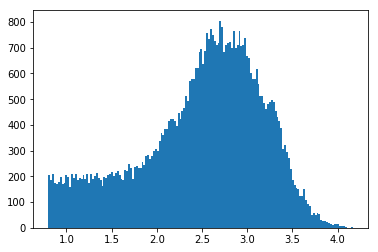

('tstart', u'17:20')
/home/bianca/Documents/github/locustVR/databases/data_collection/dd5aac5d-6706-4b09-b50f-bd3cf13cdc91/results.csv
70


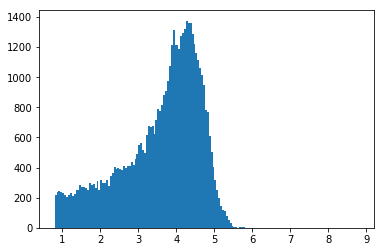

('tstart', u'18:07')
/home/bianca/Documents/github/locustVR/databases/data_collection/2f236bc2-25bd-4988-bd6e-f607b9b84f16/results.csv
71


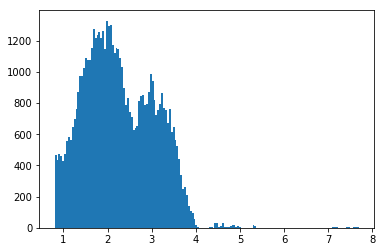

('tstart', u'19:50')
/home/bianca/Documents/github/locustVR/databases/data_collection/19ea8655-cde3-4348-8cb9-8bac6d52668c/results.csv
72


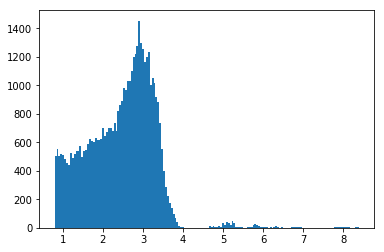

('tstart', u'20:55')
/home/bianca/Documents/github/locustVR/databases/data_collection/209364f5-752f-407b-93c9-b888cd72bed8/results.csv
73


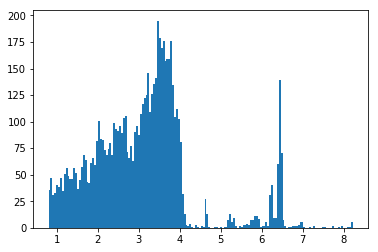

('tstart', u'11:55')
/home/bianca/Documents/github/locustVR/databases/data_collection/d1435f65-5c11-42f9-83db-b222efb9cb46/results.csv
74


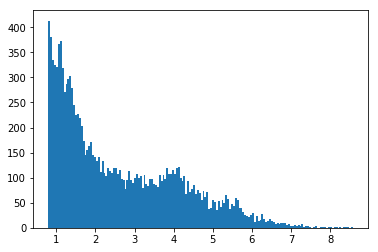

('tstart', u'13:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/e60266be-c44d-41a6-a3de-17518bccb1cc/results.csv
75


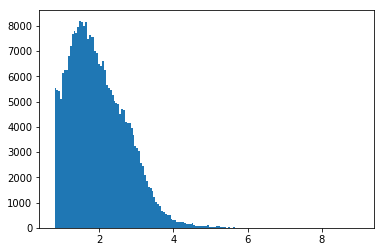

('tstart', u'14:21')
/home/bianca/Documents/github/locustVR/databases/data_collection/943385e1-c9d0-4f05-bd41-d84bfc3e6760/results.csv
76


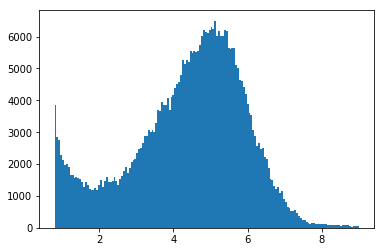

('tstart', u'10:12')
/home/bianca/Documents/github/locustVR/databases/data_collection/88f78724-8677-471b-9340-71829d40c2bb/results.csv
77


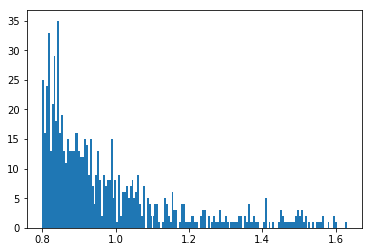

('tstart', u'11:27')
/home/bianca/Documents/github/locustVR/databases/data_collection/001d9058-7736-4d81-965f-a6daee530e55/results.csv
78


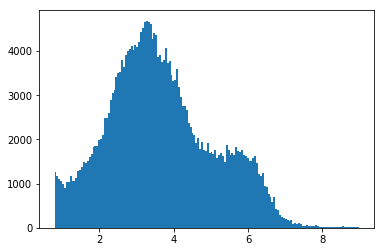

('tstart', u'12:22')
/home/bianca/Documents/github/locustVR/databases/data_collection/06afe132-3a9e-4208-8dcc-b97fb76b927d/results.csv
79


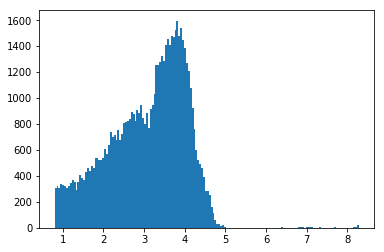

('tstart', u'13:11')
/home/bianca/Documents/github/locustVR/databases/data_collection/1eb32c86-8b1e-4786-a3b4-d87a1299ac21/results.csv
80


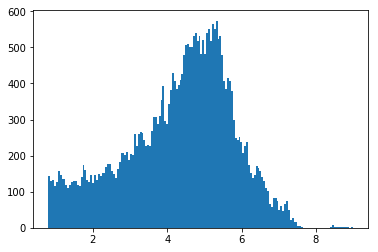

('tstart', u'14:28')
/home/bianca/Documents/github/locustVR/databases/data_collection/f5de1c9f-997f-4030-9f73-f5127abf6b6f/results.csv
81


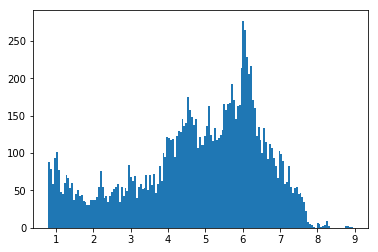

('tstart', u'16:36')
/home/bianca/Documents/github/locustVR/databases/data_collection/2d05a269-0ac1-4cdc-8a61-72d17cb62f4f/results.csv
82


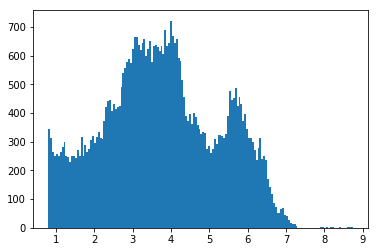

('tstart', u'16:51')
/home/bianca/Documents/github/locustVR/databases/data_collection/d433932f-4b02-4e82-8d6e-89d79d62d3c7/results.csv
83


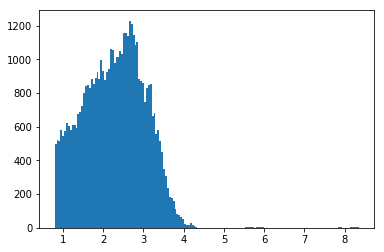

('tstart', u'17:51')
/home/bianca/Documents/github/locustVR/databases/data_collection/f4b5587a-6247-4050-b54b-dd098a5e8e50/results.csv
84


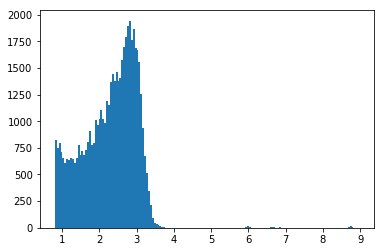

('tstart', u'18:40')
/home/bianca/Documents/github/locustVR/databases/data_collection/67b40b07-5422-4456-b330-eed415d9d94e/results.csv
85


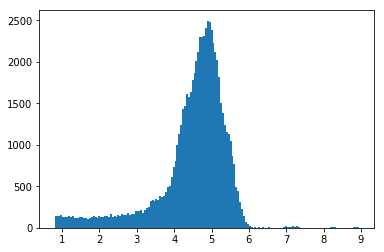

('tstart', u'10:50')
/home/bianca/Documents/github/locustVR/databases/data_collection/918fd508-a085-462b-8797-8052c4d35d84/results.csv
86


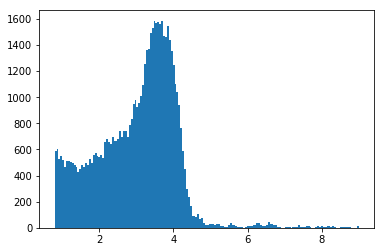

In [52]:
directory = '/home/bianca/Documents/github/locustVR/databases/data_collection/'
filename = '/results.csv'
counting=0
initialise = False
#for i in readin_id2.index:
for i in range(len(readin_id2)):
#for i in range(0,2):
    #iterate through 20 leftover exp ids in readin_id that have 2 post cond, no control, only 60°
    path = (directory + readin_id2['expId'][i] + filename)
    tstart = readin_id2['tStart'][i]
    exper_date = readin_id2['date'][i]
    print('tstart',tstart)  


    #print(path)
    
     
    try:
        df = pd.read_csv(path)
        print(path)
    
    
        #extends list to experimentID column
        df=df.assign(pos0x = (readin_id2['position_post0_x'][i]))
        df=df.assign(pos0y = (readin_id2['position_post0_y'][i]))
        #print(readin_id['expId'][i])
        df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
        stim = readin_id2['nStimuli'][i]
        #print stim
        #for j in range(0,len(df)):
        #    if df['nStimuli'][j]== stim:


        print(i)
        if initialise == False:
            df3=df
            df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
            initialise = True


        if i > 0:
            df3=df3.append(df, ignore_index=True)
            counting+=1
        #print(counting, df.count)

        window = 30
        #    rot.extend([(rotation(x,y,theta))])
        d_v3 =[]
        trajectory =  df#p1_traj # p0_traj df6 #all without noise # df3 with noise
        try:
            for i in range(window,len(trajectory)): #len(df3)# df3 = +noise
                delta=((((trajectory['x'][i]-trajectory['x'][i-window])**2 + (trajectory['y'][i]-trajectory['y'][i-window]) **2)**0.5)/(((trajectory['t'][i]-trajectory['t'][i-window])**2)**0.5))
                #if d != 0.0:
                    #d_v=( )
                d_v3.extend([(delta*100,trajectory['x'][i-window/2])]) #delta is between i and i+window, x is centered in frame
                # *100 to get cm/s
        except:
            print('sth wrong')

        spee=np.array(d_v3)[:,0]
        #spee[np.where(spee>9)[0]] = np.nan
        #plt.hist(spee)
        spee[np.where(spee>9)[0]] = np.nan
        spee_selecto = (spee>0.8 )
        #spee_selector =  (spee<9 )
        plt.hist(spee[ spee_selecto], bins= 160, label='')
        #plt.xlim([1,9])
        #plt.ylim([1,9])
        plt.show()
    except:
        print('***************************csv in row %d doesnt exist**********************' %(i))

#print('tstart', tstart)
#df3 = df3.reset_index()
#df3

('tstart', u'11:59')
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
0


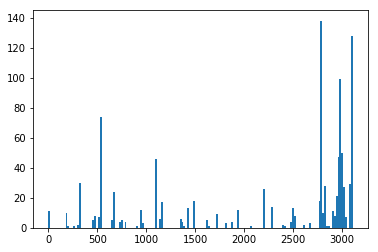

In [166]:
# STOP SELECTOR -- TIME

directory = '/home/bianca/Documents/github/locustVR/databases/data_collection/'
filename = '/results.csv'
counting=0
initialise = False
#for i in readin_id2.index:
#for i in range(len(readin_id2)):
for i in range(0,1):
    #iterate through 20 leftover exp ids in readin_id that have 2 post cond, no control, only 60°
    path = (directory + readin_id2['expId'][i] + filename)
    tstart = readin_id2['tStart'][i]
    exper_date = readin_id2['date'][i]
    print('tstart',tstart)  
    #print(path)
  
    try:
        df = pd.read_csv(path)
        print(path)
    
    
        #extends list to experimentID column
        df=df.assign(pos0x = (readin_id2['position_post0_x'][i]))
        df=df.assign(pos0y = (readin_id2['position_post0_y'][i]))
        #print(readin_id['expId'][i])
        df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
        stim = readin_id2['nStimuli'][i]
  
        print(i)
        if initialise == False:
            df3=df
            df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
            initialise = True


        if i > 0:
            df3=df3.append(df, ignore_index=True)
            counting+=1

        window = 40#20
        #    rot.extend([(rotation(x,y,theta))])
        d_v3 =[]
        t_speed=[]
        trajectory =  df#p1_traj # p0_traj df6 #all without noise # df3 with noise
        try:
            for i in range(window,len(trajectory)): #len(df3)# df3 = +noise
                delta=((((trajectory['x'][i]-trajectory['x'][i-window])**2 + (trajectory['y'][i]-trajectory['y'][i-window]) **2)**0.5)/(((trajectory['t'][i]-trajectory['t'][i-window])**2)**0.5))
                #if d != 0.0:
                    #d_v=( )
                d_v3.extend([(delta*100,trajectory['x'][i-window/2], trajectory['t'][i-window/2])]) #delta is between i and i+window, x is centered in frame
                #t_speed.extend(trajectory['t'][i-window]/2)
                # *100 to get cm/s
        except:
            print('sth wrong')

        spee=np.array(d_v3)[:,0]
        t_speed=np.array(d_v3)[:,2]
        spee[np.where(spee>9)[0]] = np.nan
        #plt.hist(spee)
        #spee[np.where(spee>9)[0]] = np.nan
        stop_selector = (spee<0.01 )
        #spee_selector =  (spee<9 )
        #plt.scatter(t_speed[stop_selector],spee[stop_selector])
        
        #plt.scatter(t_speed[spee_selecto],spee[spee_selecto])
        plt.hist( t_speed[stop_selector], bins= 160, label='')
        #plt.xlim([1,9])
        #plt.ylim([1,9])
        plt.show()
    except:
        print('***************************csv in row %d doesnt exist**********************' %(i))

#print('tstart', tstart)
#df3 = df3.reset_index()
#df3

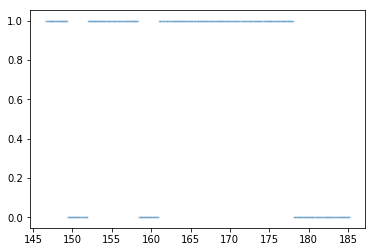

In [167]:
#plt.scatter(np.array(d_v3)[:,2],spee)
#stop_selector = (spee<0.25 )
#plt.hist( t_speed[stop_selector], bins= 320, label='')
movement=np.array(d_v3)[:,0]
movement[np.where(movement<=0.3)[0]] =0
movement[np.where(movement>0.3)[0]] =1

plt.scatter(np.array(d_v3)[4000:5000,2],movement[4000:5000],s=0.9, alpha=0.1 )

#plt.scatter(np.array(d_v3)[4000:10000,2], spee[4000:10000], c='black', s=0.1, alpha=1)
#plt.ylim=([0,9])

#plt.show()

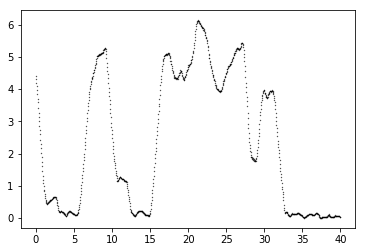

In [221]:
plt.scatter(x_time[0:1000], spee[4000:5000], c='black', s=0.1, alpha=1) #np.array(d_v3)[4000:5000,2]
plt.ylim=([0,9])


In [182]:
x_time = np.arange(0, 200, 0.04)
x_time.shape

(5000,)

In [228]:
x=np.linspace(0,5*np.pi,100)
y=np.sin(x)

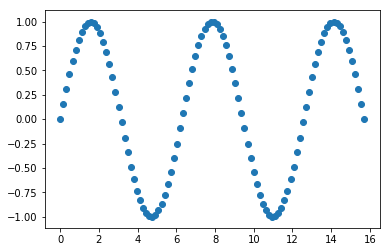

In [229]:
plt.scatter(x,y)

In [236]:
0.5/np.pi

0.15915494309189535

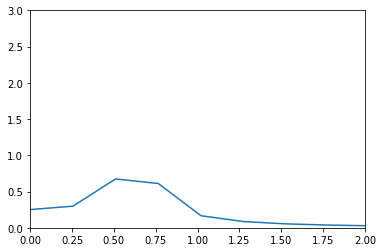

In [233]:
#fourier example
import scipy.fftpack

# Number of samplepoints
N = 100
# sample spacing
T = 0.04
#x = #np.array(d_v3)[4000:5000,2] #
x=x#x_time[0:1000] 
y = y#spee[4000:5000]
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.xlim[0, 2]

ax.set_xlim([0, 2])
ax.set_ylim([0, 3])
plt.show()


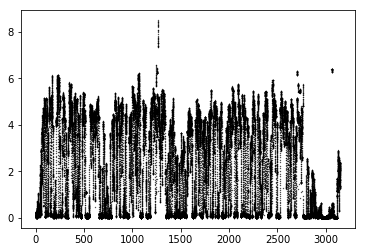

In [157]:
plt.scatter(np.array(d_v3)[:,2], spee[:], c='black', s=0.1, alpha=1)


# plotting speed

In [159]:
window = 30
#    rot.extend([(rotation(x,y,theta))])
d_v3 =[]
trajectory =  df3#p1_traj # p0_traj df6 #all without noise # df3 with noise
for i in range(window,len(trajectory)): #len(df3)# df3 = +noise
    delta=((((trajectory['x'][i]-trajectory['x'][i-window])**2 + (trajectory['y'][i]-trajectory['y'][i-window]) **2)**0.5)/(((trajectory['t'][i]-trajectory['t'][i-window])**2)**0.5))
    #if d != 0.0:
        #d_v=( )
    d_v3.extend([(delta*100,trajectory['x'][i-window/2])]) #delta is between i and i+window, x is centered in frame
    # *100 to get cm/s

(array([8.543e+03, 6.419e+03, 4.487e+03, 3.115e+03, 1.954e+03, 1.221e+03,
        8.400e+02, 6.330e+02, 5.280e+02, 4.210e+02, 4.370e+02, 3.460e+02,
        3.680e+02, 3.710e+02, 3.610e+02, 3.260e+02, 3.410e+02, 3.580e+02,
        3.550e+02, 3.610e+02, 2.890e+02, 3.590e+02, 3.300e+02, 3.900e+02,
        3.680e+02, 3.480e+02, 3.410e+02, 3.070e+02, 2.990e+02, 2.990e+02,
        3.200e+02, 3.310e+02, 4.080e+02, 3.600e+02, 3.790e+02, 4.010e+02,
        3.690e+02, 3.910e+02, 3.590e+02, 3.650e+02, 4.120e+02, 4.170e+02,
        4.060e+02, 4.060e+02, 4.120e+02, 3.520e+02, 3.630e+02, 3.660e+02,
        3.650e+02, 3.440e+02, 4.310e+02, 4.960e+02, 4.340e+02, 4.600e+02,
        4.130e+02, 4.780e+02, 5.330e+02, 4.830e+02, 5.010e+02, 5.150e+02,
        5.500e+02, 6.040e+02, 6.560e+02, 6.480e+02, 7.180e+02, 6.980e+02,
        7.040e+02, 7.360e+02, 8.140e+02, 8.470e+02, 8.330e+02, 8.160e+02,
        8.590e+02, 1.008e+03, 1.174e+03, 1.179e+03, 1.135e+03, 1.130e+03,
        1.089e+03, 1.046e+03, 9.770e+0

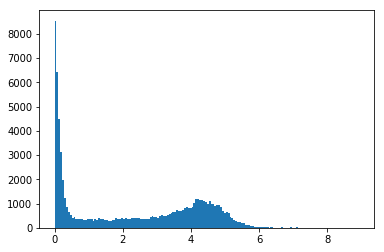

In [160]:
#data of all 30 degree traj (to both posts)
spee=np.array(d_v3)[:,0]
#spee[np.where(spee>9)[0]] = np.nan
#plt.hist(spee)
spee_selector = (spee<9)
plt.hist(spee[spee_selector], bins= 160, label='')

(0, 8)

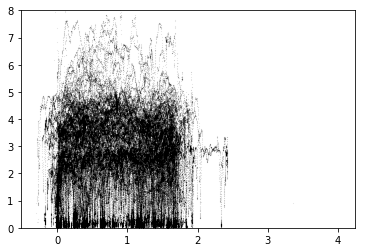

In [106]:
#color can get a list of colors to use for certain ID of the fly /locust

plt.scatter(np.array(d_v2)[:,1], np.array(d_v2)[:,0], c='black', s=0.001, alpha=1)
plt.ylim([0,8])

In [162]:
#post center position
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
dot_x

NameError: name 'habp' is not defined

In [161]:
#p1_traj[:,9] x, column 10 = y
# calc distance to post

distances1 =np.array( ((dot_x - p1_traj['x_rot'])**2 + (dot_y - p1_traj['y_rot'])**2 )**0.5)
distances1 = np.array(distances1[window/2:-window/2])
distances1.shape


NameError: name 'dot_x' is not defined

In [140]:
speeds = np.array(d_v2)[:,0]
speeds.shape

(244962,)

In [276]:
#
speeds[np.where(speeds>9)[0]] = np.nan
speeds[np.where(speeds<0)[0]] = np.nan
speed_selector = (speeds>0.75)
stop_selector = (speeds<0.05)

#stops = speeds[np.where(speeds<0.9)[0]]

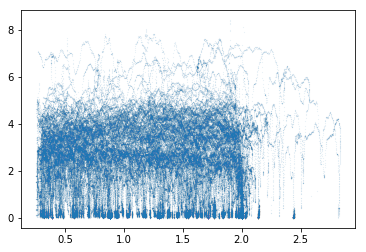

In [277]:
#distance to post1 -- speeds

plt.scatter(distances1,speeds,s=0.001, alpha=1)


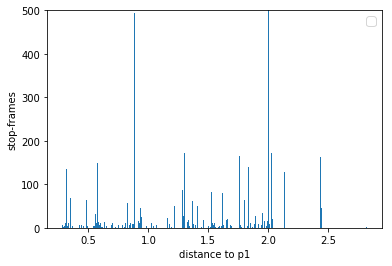

In [313]:
# plots only frames where speed< 0,05. dist p1 -- stoop frames
#plt.scatter(distances1[stop_selector],speeds[stop_selector],s=0.1, alpha=1)
plt.ylim([0,500])
plt.xlabel('distance to p1')
plt.ylabel('stop-frames')


plt.hist(distances1[stop_selector], bins= 600, label='')
plt.legend(fontsize=12)


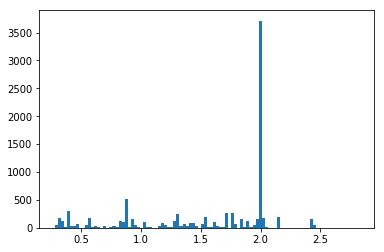

In [305]:
counts, bins, bars = plt.hist(distances1[stop_selector], bins= 100)
#counts is value in the bin

# apply fourier!

In [181]:
print(angle_used*180/math.pi)

30.0


In [159]:
#statistics, bin_edges, binnum = stats.binned_statistic(distances1[stop_selector],speeds[stop_selector],statistic='median',bins=150)
#bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
#plt.scatter(bin_mids,statistics,label='only speed<0.')

#plt.hist()

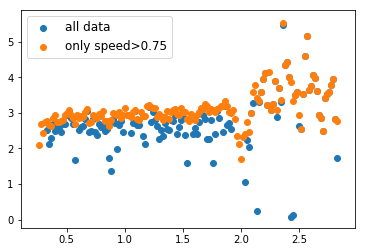

In [187]:
#median speed values per distance bin 

statistics, bin_edges, binnum = stats.binned_statistic(distances1,speeds,statistic='median',bins=150)
bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
plt.scatter(bin_mids,statistics,label='all data')

statistics, bin_edges, binnum = stats.binned_statistic(distances1[speed_selector],speeds[speed_selector],statistic='median',bins=150)
bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
plt.scatter(bin_mids,statistics,label='only speed>0.75')
#plt.ylim([1,3.5])
#plt.xlim([0,1])

plt.legend(fontsize=12)

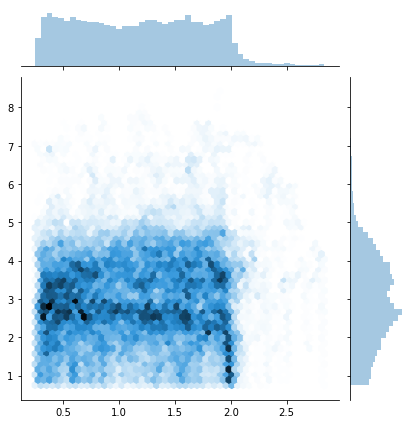

In [118]:
import seaborn as sns
sns.jointplot(distances1[speed_selector],speeds[speed_selector],kind='hex')

In [121]:
#stats

#df6.describe()
speed_df= pd.DataFrame(speeds)#
#speed_df.describe()


NameError: name 'speeds' is not defined

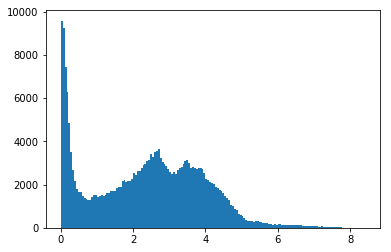

In [227]:
#plt.hist(speeds)




pylab.figure()
pylab.hist(speeds[~np.isnan(speeds)], bins=160)
pylab.show()

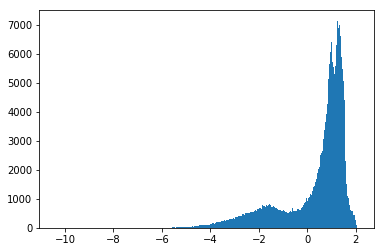

In [325]:
counts, bins, bars = pylab.hist(np.log(speeds[~np.isnan(speeds)]), bins =360)


TypeError: %o format: a number is required, not numpy.ndarray

In [228]:
#path = '/home/bianca/Documents/github/locustVR/plotting/csv_rot_data/'
with open(path+'two_post_speeds'+'_'+str(ANGLE)  +'.csv', 'w') as output:
    csv.writer(output, delimiter=',').writerows(np.array(d_v2))
 


# gamma-mixture model

In [ ]:
data = mixture.DataSet()
data.fromList(d_v2)



ValueError: x and y must be the same size

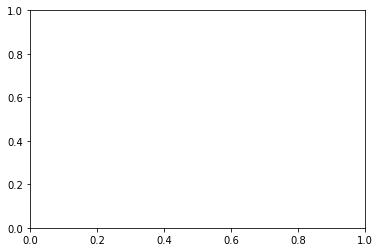

In [103]:
#x_coord -- speed

plt.scatter(df6['x_rot'][window:],speeds,s=0.0001, alpha=1)

#df6['x'][:]

(array([6.86560e+04, 1.06503e+05, 1.04195e+05, 1.16205e+05, 1.00358e+05,
        4.61400e+03, 1.35400e+03, 7.16000e+02, 1.00000e+00, 1.00000e+00]),
 array([-0.30852875,  0.12529639,  0.55912152,  0.99294666,  1.42677179,
         1.86059693,  2.29442206,  2.7282472 ,  3.16207233,  3.59589747,
         4.0297226 ]),
 <a list of 10 Patch objects>)

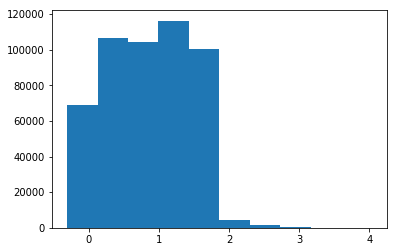

In [169]:
plt.hist(df6['x_rot'])

In [170]:
df6.shape

(502603, 11)

In [171]:
len(speeds)

502601

(array([136803.,  51518.,  70606.,  83684.,  72334.,  49277.,  21559.,
          9461.,   4938.,   2421.]),
 array([0.        , 0.79999621, 1.59999241, 2.39998862, 3.19998482,
        3.99998103, 4.79997724, 5.59997344, 6.39996965, 7.19996585,
        7.99996206]),
 <a list of 10 Patch objects>)

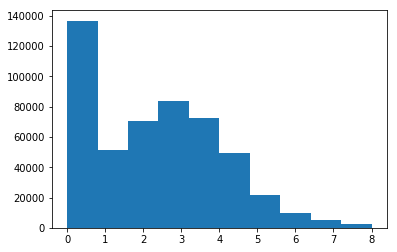

In [172]:
plt.hist(speeds)

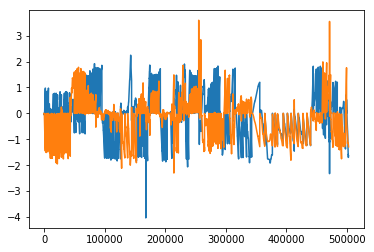

In [134]:
plt.plot(df6['x'][:])
plt.plot(df6['y'][:])
# plt.xlim([8700,11200])

(array([6.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 8.00000e+00,
        3.00000e+00, 5.02556e+05, 1.30000e+01, 7.00000e+00, 3.00000e+00]),
 array([-2159.99673581, -1836.23971434, -1512.48269286, -1188.72567139,
         -864.96864991,  -541.21162844,  -217.45460697,   106.30241451,
          430.05943598,   753.81645746,  1077.57347893]),
 <a list of 10 Patch objects>)

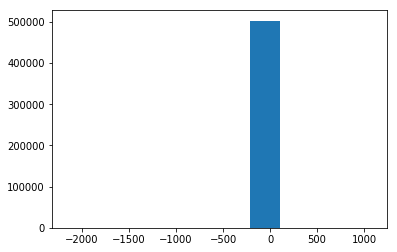

In [135]:
tt  = df6['t']
plt.hist(np.diff(tt))

In [136]:
xx = df6['x']
yy = df6['y']
distxxyy = np.sqrt(np.diff(xx)**2+np.diff(yy)**2)
speed = distxxyy/np.diff(tt)

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


(array([165806.,  68287.,  54327.,  63956.,  60859.,  48604.,  35061.,
         23213.,  11467.,   5184.]),
 array([0.        , 0.02428692, 0.04857384, 0.07286077, 0.09714769,
        0.12143461, 0.14572153, 0.17000845, 0.19429538, 0.2185823 ,
        0.24286922]),
 <a list of 10 Patch objects>)

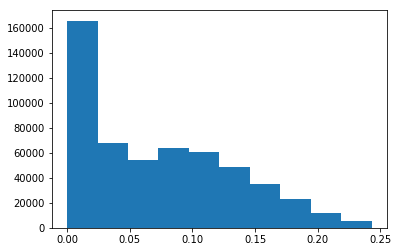

In [85]:
dt = 1/100.0
threshold = np.quantile(distxxyy,0.99)
plt.hist(distxxyy[distxxyy<threshold]/dt)

In [86]:
np.quantile(distxxyy,[0.95,0.99,1])

array([1.87749777e-03, 2.42869656e-03, 4.21449817e+00])

In [87]:
np.quantile(np.diff(tt),[0.95,0.99,1])

array([4.74081000e-02, 5.54991865e-02, 1.07757348e+03])

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

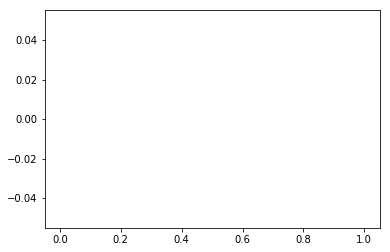

In [88]:
threshold = np.quantile(speed,0.99)
plt.hist(speed[speed<threshold])